In [135]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Plotly visualizations
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# plotly.tools.set_credentials_file(username='AlexanderBach', api_key='o4fx6i1MtEIJQxfWYvU1')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

from IPython.display import Image
from IPython.display import HTML

import pweave

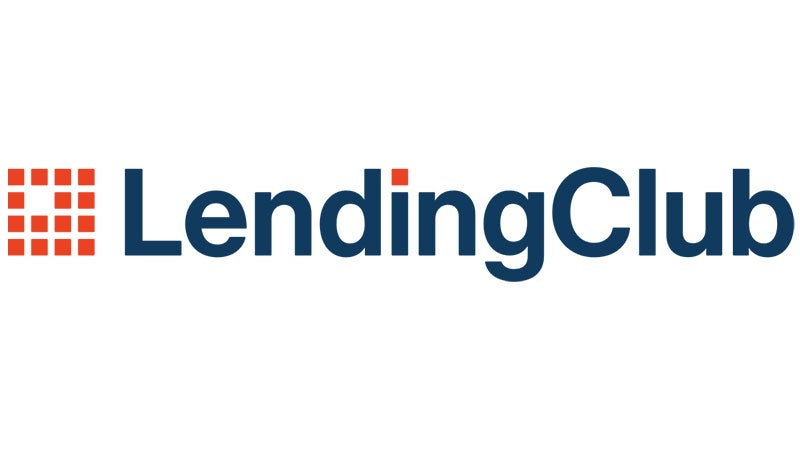

In [2]:
Image("Imagem/lending.jpg", width=400, embed=True)

In [3]:
# Esconder o codigo
print("Para a visualização dos códigos, use o botão abaixo")
HTML('''
<script>
function mudarNome()
{
     if(document.getElementById("button").value == "Hide")
     {
        document.getElementById("button").value = "Code";
        $('div.input').hide();
     } 
     else
     {
          document.getElementById("button").value = "Hide";
          $('div.input').show();
     }
}
</script>

<body>
    <input type="button" id="button" onclick="mudarNome();" value="Hide" />
</body>''')

Para a visualização dos códigos, use o botão abaixo


### LendingClub

LendingClub é uma empresa americana de empréstimos ponto a ponto, ou seja, desde o empréstimo até o investimento, com sede em San Francisco, Califórnia. Foi o primeiro credor ponto a ponto a registrar suas ofertas como títulos na *Securities and Exchange Commission* (SEC) e a oferecer operações de empréstimos em um mercado secundário. O LendingClub é a maior plataforma de empréstimos ponto a ponto do mundo. A empresa alega que US\\$ 15,98 bilhões em empréstimos foram originados por meio de sua plataforma até 31 de dezembro de 2015.

A LendingClub permite que os mutuários criem empréstimos pessoais não garantidos entre US\\$ 1.000 e US\\$ 40.000. O período de empréstimo padrão é de três anos. Os investidores podem pesquisar e navegar pelas listagens de empréstimos do site LendingClub e selecionar empréstimos nos quais desejam investir com base nas informações fornecidas sobre o mutuário, montante do empréstimo, grau do empréstimo e finalidade do empréstimo. Os investidores ganham dinheiro com juros. O LendingClub ganha dinheiro cobrando dos devedores uma taxa de fonte e dos investidores uma taxa de serviço.

A LendingClub também faz empréstimos tradicionais diretos ao consumidor, incluindo transações de refinanciamento de automóveis, por meio do WebBank, um banco industrial estatal com seguro FDIC e sede em Salt Lake City, Utah. Os empréstimos não são financiados pelos investidores, mas são atribuídos a outras instituições financeiras.

A empresa levantou US\\$ 1 bilhão no que se tornou o **maior IPO de tecnologia de 2014 nos Estados Unidos**. Embora visto como pioneiro no setor de *fintech* é uma das maiores empresas do gênero.


### Destaques

Em 2011 e 2012, a empresa foi nomeada como uma das *AlwaysOn Global* 250. A LendingClub é vencedora do Prêmio Pioneiro em Tecnologia do Fórum Econômico Mundial de 2012. Foi reconhecida pela Forbes como uma das 20 empresas mais promissoras da América em 2011 e 2012, e pela Fast Company como uma das dez empresas financeiras mais inovadoras do mundo. Foi nomeado um dos Disruptor 50 pela CNBC em maio de 2013 e 2014, como um inovador disruptivo nos serviços financeiros da próxima geração. Em 2014, a LendingClub foi reconhecido pela Inc. como uma das 500 empresas privadas de mais rápido crescimento nos Estados Unidos na posição #248. Renaud Laplanche, fundador e CEO da empresa, também recebeu o *Economist Innovation Award* em 2014 pela categoria de produtos de consumo.


### Dataset

O dataset contêm dados completos do empréstimo para todos os empréstimos emitidos no período 2013-2018, incluindo o *status* atual do empréstimo (*Current*, *Late* e *Default*) e as informações mais recentes sobre pagamento. O arquivo que contém dados do empréstimo por meio do "presente" contém dados completos do empréstimo para todos os empréstimos emitidos no trimestre calendário anterior concluído. Os recursos adicionais incluem pontuação de crédito, número de consultas financeiras, endereço incluindo CEP, estado e cobranças, entre outros. O arquivo é uma matriz de cerca de 248196 observações e 145 variáveis. Um dicionário de dados é fornecido em um arquivo separado.

### Apresentação do Dataset

Abaixo,as 5 primeiras linhas com parte das 145 colunas do dataset.

In [213]:
filepath = 'loan_data.csv'
raw_data = pd.read_csv(filepath,low_memory=False)

raw_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20975,20975,20975,36 months,8.19,659.13,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,20000,20000,20000,36 months,11.80,662.38,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,9100,9100,9100,36 months,26.31,368.15,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,3525,3525,3525,36 months,25.34,140.79,E,E3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,11500,11500,11500,36 months,13.56,390.59,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,22000,22000,22000,36 months,7.02,679.50,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,30000,30000,30000,60 months,26.31,903.73,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,9500,9500,9500,36 months,26.31,384.34,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,16000,16000,16000,36 months,15.02,554.81,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,7400,7400,7400,36 months,27.27,303.18,E,E5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### Objetivo

O objetivo é analisar os dados dos clientes (onde são alocados os empréstimos), para termerminar **qual cliente terá atraso** no pagamento do empréstimo. Dessa forma, a variável *target* aqui é a ***loan_status***, a qual possue as seguintes classificações:

- *Current*, com 222531 indivíduos;
- *Late (31-120 days)* com 21897 indivíduos;
- *Late (16-30 days)* com 3737 indivíduos;
- *Default* com 31 indivíduos.

Esses *status* serão reclassificados, de forma que, *Current* será igualado ao valor zero (0) e os demais serão igualados à um (1). 

In [5]:
raw_data['loan_status'].value_counts()

Current               222531
Late (31-120 days)     21897
Late (16-30 days)       3737
Default                   31
Name: loan_status, dtype: int64

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248196 entries, 0 to 248195
Columns: 145 entries, id to settlement_term
dtypes: float64(66), int64(43), object(36)
memory usage: 274.6+ MB


### Visualizações e *Insights* do Dataset

In [7]:
variaveis = raw_data.columns.sortlevel()[0]

In [8]:
variaveis.values

array(['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util',
       'annual_inc', 'annual_inc_joint', 'application_type',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'deferral_term', 'delinq_2yrs',
       'delinq_amnt', 'desc', 'disbursement_method', 'dti', 'dti_joint',
       'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt',
       'funded_amnt_inv', 'grade', 'hardship_amount', 'hardship_dpd',
       'hardship_end_date', 'hardship_flag',
       'hardship_last_payment_amount', 'hardship_length',
       'hardship_loan_status', 'hardship_payoff_balance_amount',
       'hardship_reason', 'hardship_start_date', 'hardship_status',
       'hardship_type', 'home_ownership', 'id', 'il_util',
       'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths',
       'installment', 'int_rate', 'issue_

Verificando a distribuição de montantes por mutuários (os que precisam do empréstimo) e os investidores. No gráficos são mostrados os **Financiamentos dos Empréstimos**, assim como o **Montante Financiado**, os quais possuem uma mesma distribuição de valores, o que leva a crer que os que precisarem de financiamento provavelmente conseguirão, dada a oferta. Há também o **Total Aplicado pelos Investidores**, que possue uma quantidade maior do que os demais anteriores citados, demonstrando um mercado "aquecido".

C:\Users\Public\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 5000)

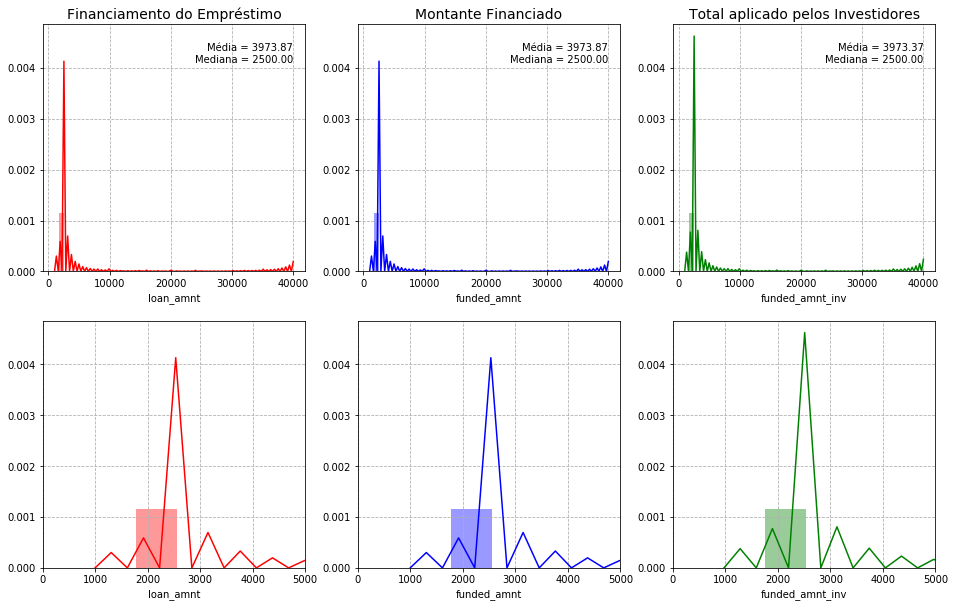

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(16,10))

############################################################# LINHA 1
sns.distplot(raw_data["loan_amnt"],ax=ax[0,0],color="red")
ax[0,0].set_title("Financiamento do Empréstimo", fontsize=14)
ax[0,0].grid(which='both',linestyle='--')
t = 'Média = %.2f\nMediana = %.2f' % (raw_data["loan_amnt"].mean(), raw_data["loan_amnt"].median())
ax[0,0].text(40000,0.0045, t, horizontalalignment='right', verticalalignment='top')

sns.distplot(raw_data["funded_amnt"], ax=ax[0,1], color="blue")
ax[0,1].set_title("Montante Financiado", fontsize=14)
ax[0,1].grid(which='both',linestyle='--')
t2 = 'Média = %.2f\nMediana = %.2f' % (raw_data["funded_amnt"].mean(), raw_data["funded_amnt"].median())
ax[0,1].text(40000,0.0045, t2, horizontalalignment='right', verticalalignment='top')

sns.distplot(raw_data["funded_amnt_inv"], ax=ax[0,2], color="green")
ax[0,2].set_title("Total aplicado pelos Investidores", fontsize=14)
ax[0,2].grid(which='both',linestyle='--')
t3 = 'Média = %.2f\nMediana = %.2f' % (raw_data["funded_amnt_inv"].mean(), raw_data["funded_amnt_inv"].median())
ax[0,2].text(40000,0.0045, t3, horizontalalignment='right', verticalalignment='top')

ax[0,0].set_ylim(ax[0,2].set_ylim())
ax[0,1].set_ylim(ax[0,2].set_ylim())

############################################################# LINHA 2
sns.distplot(raw_data["loan_amnt"],ax=ax[1,0], color="red")
ax[1,0].grid(which='both',linestyle='--')

sns.distplot(raw_data["funded_amnt"], ax=ax[1,1], color="blue")
ax[1,1].grid(which='both',linestyle='--')

sns.distplot(raw_data["funded_amnt_inv"], ax=ax[1,2], color="green")
ax[1,2].grid(which='both',linestyle='--')

ax[1,0].set_ylim(ax[1,2].set_ylim())
ax[1,1].set_ylim(ax[1,2].set_ylim())

ax[1,0].set_xlim(0,5000)
ax[1,1].set_xlim(0,5000)
ax[1,2].set_xlim(0,5000)

Dados sobre o financiamento ao longo de 5 anos, nos mostram, em contraponto ao exposto anteriormente, uma possível queda de insvestimentos para esse tipo de mercado, considerando que depois de 2015, o **Montante Médio** foi decaindo, até se encontrar em seu menor patamar, ao longo desses anos, em 2018.

A quantidade de empréstimo em 2018 foi de, aproximadamente, 92,82\% do total de todos os 5 anos, o que explica a concentração do montante, anteriormente, em 2.500,00 e no gráfico abaixo a diminuição da média montante.

In [10]:
df_anos = raw_data.copy()
dt_series = pd.to_datetime(df_anos['issue_d'])
df_anos['year'] = dt_series.dt.year

C:\Users\Public\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Montante Médio')

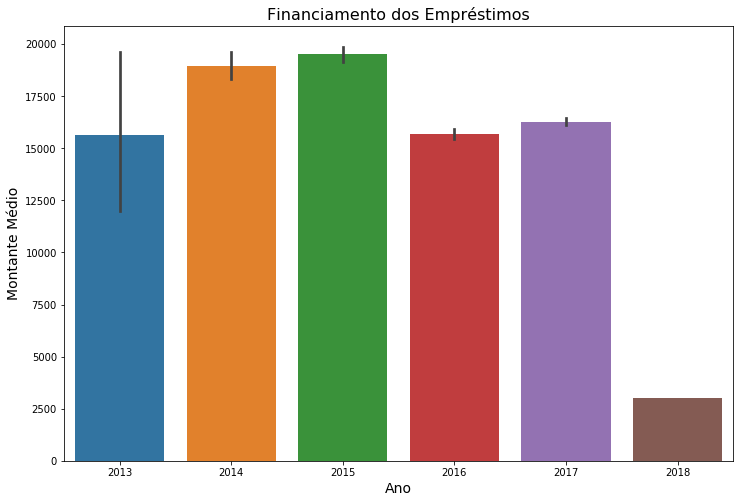

In [11]:
plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amnt', data=df_anos, palette='tab10')
plt.title('Financiamento dos Empréstimos', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Montante Médio', fontsize=14)

In [12]:
df_anos.groupby('year').loan_amnt.count()

year
2013        10
2014       434
2015      1808
2016      5773
2017      9799
2018    230372
Name: loan_amnt, dtype: int64

In [13]:
df_anos['addr_state'].unique()

array(['PA', 'NC', 'IN', 'GA', 'MT', 'VA', 'TX', 'NV', 'NY', 'FL', 'CA',
       'UT', 'WA', 'IL', 'MO', 'MS', 'HI', 'NH', 'MI', 'CT', 'WI', 'TN',
       'ND', 'AL', 'CO', 'MD', 'NJ', 'AR', 'MN', 'KS', 'OH', 'KY', 'AZ',
       'NM', 'MA', 'VT', 'NE', 'OR', 'WV', 'SC', 'ID', 'RI', 'DC', 'DE',
       'LA', 'OK', 'AK', 'ME', 'SD', 'WY'], dtype=object)

In [14]:
oeste = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
sudoeste = ['AZ', 'TX', 'NM', 'OK']
sudeste = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
centro_oeste = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
nordeste = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

def finding_regions(state):
    if state in oeste:
        return 'Oeste'
    elif state in sudoeste:
        return 'Sudoeste'
    elif state in sudeste:
        return 'Sudeste'
    elif state in centro_oeste:
        return 'Centro_oeste'
    elif state in nordeste:
        return 'Nordeste'
    
df_anos['regiao'] = df_anos['addr_state'].apply(finding_regions)

In [15]:
df_anos['complete_date'] = pd.to_datetime(df_anos['issue_d'])
df_anos['complete_date'].head()

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: complete_date, dtype: datetime64[ns]

In [118]:
grupo_dates = df_anos.groupby(['complete_date', 'regiao'], as_index=False).sum()
grupo_dates.head()

,complete_date,regiao,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,...,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,year
0,2013-08-01,Nordeste,0.0,0.0,14125,14125,14125,17.56,355.31,56000.0,...,44.14,3.0,26.0,132.42,3102.64,101.81,0.0,0.00,0.0,2013
1,2013-12-01,Centro_oeste,0.0,0.0,38000,38000,38000,31.87,942.21,260000.0,...,0.00,0.0,0.0,0.00,0.00,0.00,711.0,45.03,15.0,4026
2,2013-12-01,Nordeste,0.0,0.0,28500,28500,28450,38.79,729.68,132000.0,...,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,4026
3,2013-12-01,Oeste,0.0,0.0,10000,10000,10000,24.50,290.59,90000.0,...,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,2013
4,2013-12-01,Sudeste,0.0,0.0,65850,65850,65775,83.78,1813.21,249000.0,...,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,8052


In [119]:
grupo_dates['issue_d'] = [mes.to_period('M') for mes in grupo_dates['complete_date']]
grupo_dates['issue_d'].head()

0   2013-08
1   2013-12
2   2013-12
3   2013-12
4   2013-12
Name: issue_d, dtype: object

In [120]:
grupo_dates = grupo_dates.groupby(['issue_d', 'regiao'], as_index=False).sum()
grupo_dates.head()

,issue_d,regiao,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,...,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,year
0,2013-08,Nordeste,0.0,0.0,14125,14125,14125,17.56,355.31,56000.0,...,44.14,3.0,26.0,132.42,3102.64,101.81,0.0,0.00,0.0,2013
1,2013-12,Centro_oeste,0.0,0.0,38000,38000,38000,31.87,942.21,260000.0,...,0.00,0.0,0.0,0.00,0.00,0.00,711.0,45.03,15.0,4026
2,2013-12,Nordeste,0.0,0.0,28500,28500,28450,38.79,729.68,132000.0,...,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,4026
3,2013-12,Oeste,0.0,0.0,10000,10000,10000,24.50,290.59,90000.0,...,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,2013
4,2013-12,Sudeste,0.0,0.0,65850,65850,65775,83.78,1813.21,249000.0,...,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,8052


In [19]:
# grupo_dates['loan_amnt'] = grupo_dates['loan_amnt']/1000
# grupo_dates['loan_amnt'].head()

0    14.125
1    38.000
2    28.500
3    10.000
4    65.850
Name: loan_amnt, dtype: float64

In [121]:
df_dates = pd.DataFrame(data=grupo_dates[['issue_d','regiao','loan_amnt']])
df_dates.head()

,issue_d,regiao,loan_amnt
0,2013-08,Nordeste,14125
1,2013-12,Centro_oeste,38000
2,2013-12,Nordeste,28500
3,2013-12,Oeste,10000
4,2013-12,Sudeste,65850


(580.8, 590.2)

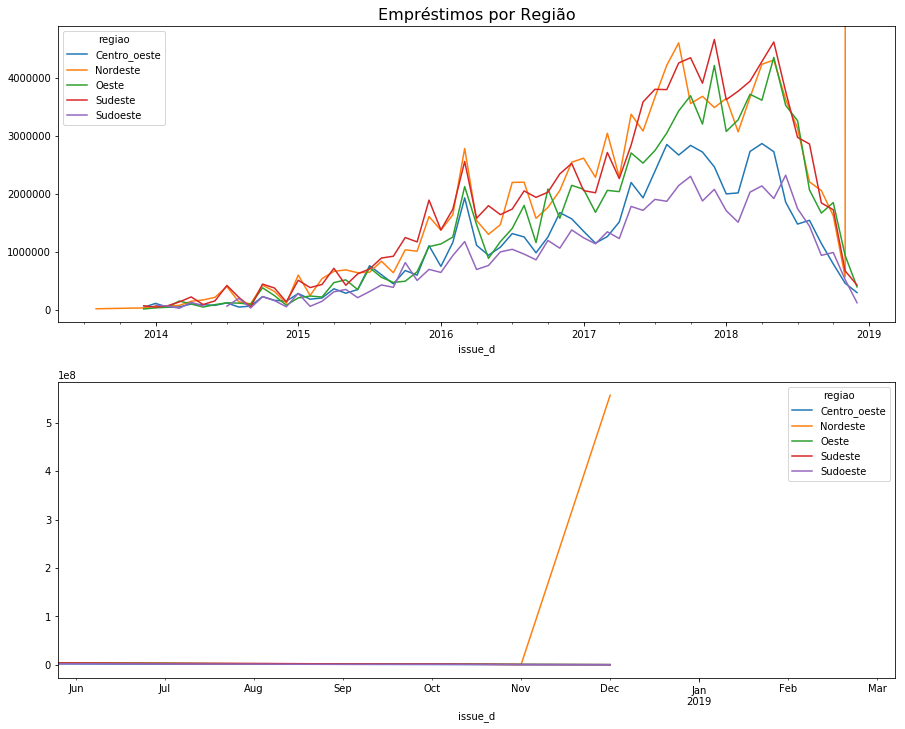

In [126]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

emitidos_regiao = df_dates.groupby(['issue_d', 'regiao']).loan_amnt.sum()
#emitidos_regiao = emitidos_regiao.drop([['2018-12','Nordeste']],axis=0)  # Provavelmente um outLier, por isso saiu
emitidos_regiao.unstack().plot(stacked=False, grid=False, legend=True,ax=ax[0])
ax[0].set_title('Empréstimos por Região', fontsize=16)
ax[0].set_ylim(-222827.50000000001, 4899377.5000000005)    # valor obtido por teste

emitidos_regiao2 = df_dates.groupby(['issue_d', 'regiao']).loan_amnt.sum()
emitidos_regiao2.unstack().plot(stacked=False, grid=False, legend=True,ax=ax[1])
ax[1].set_xlim(580.8, 590.2)

In [22]:
df_proposito = pd.DataFrame(data=df_anos[['issue_d','purpose','loan_amnt']])
df_proposito['issue_d'] = grupo_dates['issue_d']
df_proposito.head()

,issue_d,purpose,loan_amnt
0,2013-08,debt_consolidation,20975
1,2013-12,vacation,20000
2,2013-12,other,9100
3,2013-12,debt_consolidation,3525
4,2013-12,debt_consolidation,11500


In [159]:
# loan_status cross
loan_status_cross = pd.crosstab(df_anos['year'], df_anos['purpose']).apply(lambda x: x/x.sum() * 100)
number_of_loanstatus = pd.crosstab(df_anos['year'], df_anos['purpose'])


# Round our values
loan_status_cross['debt_consolidation'] = loan_status_cross['debt_consolidation'].apply(lambda x: round(x, 2))
loan_status_cross['credit_card'] = loan_status_cross['credit_card'].apply(lambda x: round(x, 2))
loan_status_cross['other'] = loan_status_cross['other'].apply(lambda x: round(x, 2))
loan_status_cross['home_improvement'] = loan_status_cross['home_improvement'].apply(lambda x: round(x, 2))
loan_status_cross['major_purchase'] = loan_status_cross['major_purchase'].apply(lambda x: round(x, 2))
loan_status_cross['small_business'] = loan_status_cross['small_business'].apply(lambda x: round(x, 2))
loan_status_cross['medical'] = loan_status_cross['medical'].apply(lambda x: round(x, 2))
loan_status_cross['house'] = loan_status_cross['house'].apply(lambda x: round(x, 2))
loan_status_cross['car'] = loan_status_cross['car'].apply(lambda x: round(x, 2))
loan_status_cross['moving'] = loan_status_cross['moving'].apply(lambda x: round(x, 2))
loan_status_cross['vacation'] = loan_status_cross['vacation'].apply(lambda x: round(x, 2))
loan_status_cross['renewable_energy'] = loan_status_cross['renewable_energy'].apply(lambda x: round(x, 2))

number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1) 
#number_of_loanstatus

In [214]:
number_of_loanstatus

purpose,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,Total
year,,,,,,,,,,,,,
2013,0,0,9,0,0,0,0,0,1,0,0,0,10
2014,0,87,285,28,0,7,5,2,16,0,2,2,434
2015,15,374,1154,113,8,27,15,5,70,1,22,4,1808
2016,52,1087,3463,376,41,137,66,44,376,2,85,44,5773
2017,94,1812,5734,642,73,258,143,77,717,7,152,90,9799
2018,84,1433,226719,542,124,244,144,84,779,7,151,61,230372


In [157]:
debt_consolidation = loan_status_cross['debt_consolidation'].values.tolist()
credit_card        = loan_status_cross['credit_card'].values.tolist()
other              = loan_status_cross['other'].values.tolist()
home_improvement   = loan_status_cross['home_improvement'].values.tolist()
major_purchase     = loan_status_cross['major_purchase'] .values.tolist()
small_business     = loan_status_cross['small_business'].values.tolist()
medical            = loan_status_cross['medical'].values.tolist()
house              = loan_status_cross['house'].values.tolist()
car                = loan_status_cross['car'].values.tolist()
moving             = loan_status_cross['moving'].values.tolist()
vacation           = loan_status_cross['vacation'] .values.tolist()
renewable_energy   = loan_status_cross['renewable_energy'].values.tolist()



debt = go.Bar(
    x=number_of_loanstatus.index,#df_anos['year'].value_counts().index,#df_anos['year'].unique(),
    y= debt_consolidation,
    name='Debito Consolidado',
    marker=dict(
        color='rgb(192, 148, 246)'
    ),
    text = '%'
)

credit = go.Bar(
    x=number_of_loanstatus.index,
    y=credit_card,
    name='Cartao de Credito',
    marker=dict(
        color='rgb(176, 26, 26)'
    ),
    text = '%'
)

other = go.Bar(
    x=number_of_loanstatus.index,
    y= other,
    name='Outros',
    marker = dict(
        color='rgb(229, 121, 36)'
    ),
    text = '%'
)

home = go.Bar(
    x=number_of_loanstatus.index,
    y= home_improvement,
    name='Reformas do Lar',
    marker = dict(
        color='rgb(147, 147, 147)'
    ),
    text = '%'
)

major = go.Bar(
    x=number_of_loanstatus.index,
    y= major_purchase,
    name='Major Purchase', 
#     marker = dict(
#         color='rgb(246, 157, 135)'
#     ),
    text = '%'
)

small = go.Bar(
    x=number_of_loanstatus.index,
    y= small_business,
    name='Pequenos Negocios',
#     marker = dict(
#         color = 'rgb(238, 76, 73)'
#         ),
    text = '%'
)
medical = go.Bar(
    x=number_of_loanstatus.index,
    y= medical,
    name='Saude',
#     marker=dict(
#         color='rgb(192, 148, 246)'
#     ),
    text = '%'
)

house = go.Bar(
    x=number_of_loanstatus.index,
    y=house,
    name='Imovel',
#     marker=dict(
#         color='rgb(176, 26, 26)'
#     ),
    text = '%'
)

car = go.Bar(
    x=number_of_loanstatus.index,
    y= car,
    name='Carro',
#     marker = dict(
#         color='rgb(229, 121, 36)'
#     ),
    text = '%'
)

moving = go.Bar(
    x=number_of_loanstatus.index,
    y= moving,
    name='Mudança',
#     marker = dict(
#         color='rgb(147, 147, 147)'
#     ),
    text = '%'
)

vacation = go.Bar(
    x=number_of_loanstatus.index,
    y= vacation,
    name='Ferias', 
#     marker = dict(
#         color='rgb(246, 157, 135)'
#     ),
    text = '%'
)

renewable = go.Bar(
    x=number_of_loanstatus.index,
    y= renewable_energy,
    name='Energia Renovavel',
#     marker = dict(
#         color = 'rgb(238, 76, 73)'
#         ),
     text = '%'
)

data = [debt, credit, other, home, major, small, medical, house, car, moving, vacation, renewable]
layout = go.Layout(
    barmode='stack',
    title = 'Tipo de Empréstimo por Ano',
    xaxis=dict(title='Empréstimos')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

In [166]:
df_anos.int

0    165000.0
1     50000.0
2     62000.0
3    150000.0
4     33000.0
Name: annual_inc, dtype: float64

In [179]:
by_loan_amount = df_anos.groupby(['regiao','addr_state'], as_index=False).loan_amnt.sum()
by_interest_rate = df_anos.groupby(['regiao', 'addr_state'], as_index=False).int_rate.mean()
by_income = df_anos.groupby(['regiao', 'addr_state'], as_index=False).annual_inc.mean()

# Take the values to a list for visualization purposes.
states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amnt'].values.tolist()
average_interest_rates = by_interest_rate['int_rate'].values.tolist()
average_annual_income = by_income['annual_inc'].values.tolist()


from collections import OrderedDict

# Figure Number 1 (Perspective for the Business Operations)
metrics_data = OrderedDict([('UF_estados', states),
                            ('emp_emitidos', average_loan_amounts),
                            ('taxa_inter', average_interest_rates),
                            ('anual_incom', average_annual_income)])
                     

metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
#metrics_df.head()

In [183]:
metrics_df.sort_values(by='emp_emitidos',ascending=False).head()

,UF_estados,emp_emitidos,taxa_inter,anual_incom
17,NY,597390400,13.58,55256.11
22,CA,59547125,15.26,85096.15
49,TX,38658150,15.54,78759.40
36,FL,34635300,15.70,74344.23
16,NJ,16379300,15.52,91003.39


In [212]:
for col in metrics_df.columns:
    metrics_df[col] = metrics_df[col].astype(str)
    
scl = [[0.0, 'rgb(210, 241, 198)'],[0.2, 'rgb(188, 236, 169)'],[0.4, 'rgb(171, 235, 145)'],\
            [0.6, 'rgb(140, 227, 105)'],[0.8, 'rgb(105, 201, 67)'],[1.0, 'rgb(59, 159, 19)']]

metrics_df['text'] = metrics_df['UF_estados'] + '<br>' +\
'Taxa média de juros de empréstimos: ' + metrics_df['taxa_inter'] + '<br>'+\
'Renda anual média: ' + metrics_df['anual_incom'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = metrics_df['UF_estados'],
        z = metrics_df['emp_emitidos'], 
        locationmode = 'USA-states',
        text = metrics_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]


layout = dict(
    title = 'Empréstimos concedidos a clubes de empréstimos <br> (Uma perspectiva para as operações comerciais)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        #showlakes = True,
        #lakecolor = 'rgb(255, 255, 255)'   # Aparecer os Lagos
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

### Vericando valores NaN no Dataset

Verificando quais colunas tem valores nulos e quantos são. Com estes valores, foram retiradas as colunas com 50\% (por volta de 124096) valores não numéricos.

In [25]:
colunas = raw_data.columns

count = 0
for col in colunas:
    if (raw_data[str(col)].isnull().sum()>=240000):
        print(str(col))
        print(raw_data[str(col)].isnull().sum())
        print('\n')
        count=count+1
        
print('Quantidade de colunas com mais de 240k NaN -',count)

id
248196


member_id
248196


url
248196


desc
248175


mths_since_last_major_derog
240217


annual_inc_joint
245594


dti_joint
245594


verification_status_joint
245622


mths_since_recent_bc_dlq
241542


revol_bal_joint
245811


sec_app_earliest_cr_line
245811


sec_app_inq_last_6mths
245811


sec_app_mort_acc
245811


sec_app_open_acc
245811


sec_app_revol_util
245868


sec_app_open_act_il
245811


sec_app_num_rev_accts
245811


sec_app_chargeoff_within_12_mths
245811


sec_app_collections_12_mths_ex_med
245811


sec_app_mths_since_last_major_derog
247178


hardship_type
246328


hardship_reason
246328


hardship_status
246328


deferral_term
246328


hardship_amount
246328


hardship_start_date
246328


hardship_end_date
246328


payment_plan_start_date
246328


hardship_length
246328


hardship_dpd
246328


hardship_loan_status
246328


orig_projected_additional_accrued_interest
246525


hardship_payoff_balance_amount
246328


hardship_last_payment_amount
246328


debt_settlem

In [26]:
df_null = pd.DataFrame({'Quantidade': raw_data.isnull().sum(), 'Porcentagem': 100*raw_data.isnull().sum()/len(raw_data)})

# gerando apenas com valores acima de 0
df_null[df_null['Porcentagem'] > 1].sort_values('Porcentagem',ascending=False)

,Quantidade,Porcentagem
id,248196,100.000000
member_id,248196,100.000000
url,248196,100.000000
desc,248175,99.991539
sec_app_mths_since_last_major_derog,247178,99.589840
settlement_percentage,247170,99.586617
settlement_amount,247170,99.586617
settlement_date,247170,99.586617
settlement_status,247170,99.586617
debt_settlement_flag_date,247170,99.586617


Com base nas colunas que possuem muitos valores nulos (NaN), a celula a seguir retira as colunas que possuem, **pelo menos a metade** dos valores NaN, o que retirou 42 colunas. 

In [27]:
df_no_null = raw_data.dropna(axis=1,thresh=(0.5*len(raw_data)))

In [28]:
df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248196 entries, 0 to 248195
Columns: 103 entries, loan_amnt to debt_settlement_flag
dtypes: float64(37), int64(43), object(23)
memory usage: 195.0+ MB


A celula a seguir construirá a coluna Target, ou seja, vai agrupar os valores de **"loan_status"**, que são *late* e *Default* como 1's e *Current* como 0. 

In [29]:
loan_status_data = df_no_null.copy()

def troca_valores(row):
    if((row['loan_status']=='Default')|(row['loan_status']=='Late (31-120 days)')|(row['loan_status']=='Late (16-30 days)')):
        return 1
    else:
        return 0
    
loan_status_data['loan_status'] = loan_status_data.apply(troca_valores,axis=1)

In [30]:
loan_status_data['loan_status'].value_counts()

0    222531
1     25665
Name: loan_status, dtype: int64

In [31]:
loan_status_data.columns.values

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_record', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il

In [32]:
loan_status_data = loan_status_data[['loan_status','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 
       'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_record', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
       'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag']]

Depois de ter organizado **"loan_status_data"** de forma que a primeira coluna seja o nosso alvo (*loan_status*), a seguir será verificado a correlação das variáveis.

In [33]:
correl = loan_status_data.corr()

In [34]:
correl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, loan_status to total_il_high_credit_limit
Data columns (total 81 columns):
loan_status                   78 non-null float64
loan_amnt                     78 non-null float64
funded_amnt                   78 non-null float64
funded_amnt_inv               78 non-null float64
int_rate                      78 non-null float64
installment                   78 non-null float64
annual_inc                    78 non-null float64
dti                           78 non-null float64
delinq_2yrs                   78 non-null float64
inq_last_6mths                78 non-null float64
mths_since_last_record        78 non-null float64
open_acc                      78 non-null float64
pub_rec                       78 non-null float64
revol_bal                     78 non-null float64
revol_util                    78 non-null float64
total_acc                     78 non-null float64
out_prncp                     78 non-null float64
out_prncp_inv     

In [35]:
correl.head()

,loan_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_status,1.000000,0.813327,0.813327,0.813282,0.351156,0.805909,0.224480,0.095287,0.336904,-0.366057,...,0.163518,-0.295766,-0.548961,0.738871,-0.900890,0.106489,0.493527,0.545521,-0.592170,0.484949
loan_amnt,0.813327,1.000000,1.000000,0.999998,0.344292,0.977496,0.319093,0.086821,0.280669,-0.303721,...,0.125337,-0.249402,-0.421842,0.601170,-0.745703,0.093542,0.553579,0.566396,-0.332416,0.502732
funded_amnt,0.813327,1.000000,1.000000,0.999998,0.344292,0.977496,0.319093,0.086821,0.280669,-0.303721,...,0.125337,-0.249402,-0.421842,0.601170,-0.745703,0.093542,0.553579,0.566396,-0.332416,0.502732
funded_amnt_inv,0.813282,0.999998,0.999998,1.000000,0.344316,0.977462,0.319104,0.086800,0.280641,-0.303733,...,0.125327,-0.249401,-0.421811,0.601115,-0.745674,0.093542,0.553584,0.566372,-0.332377,0.502710
int_rate,0.351156,0.344292,0.344292,0.344316,1.000000,0.382373,0.033122,0.122893,0.138279,-0.021792,...,0.075394,0.008351,-0.222090,0.364984,-0.304901,0.028677,0.116097,0.215894,-0.323645,0.194689


In [36]:
correl['loan_status'].sort_values(ascending=False)

loan_status                   1.000000
bc_util                       0.860658
revol_util                    0.832983
all_util                      0.817412
loan_amnt                     0.813327
funded_amnt                   0.813327
funded_amnt_inv               0.813282
installment                   0.805909
percent_bc_gt_75              0.738871
total_pymnt_inv               0.729230
total_pymnt                   0.729210
mths_since_last_record        0.722637
total_rec_prncp               0.704468
out_prncp                     0.703871
out_prncp_inv                 0.703792
total_rec_int                 0.679983
num_bc_tl                     0.662123
mths_since_recent_inq         0.579813
mo_sin_rcnt_tl                0.576230
tot_cur_bal                   0.572204
mort_acc                      0.571782
mo_sin_rcnt_rev_tl_op         0.556523
num_actv_bc_tl                0.554189
mths_since_rcnt_il            0.550174
total_bal_ex_mort             0.545521
mths_since_recent_bc     

In [37]:
correl[correl['loan_status'].isnull()].index

Index(['recoveries', 'collection_recovery_fee', 'policy_code'], dtype='object')

In [38]:
correl[(correl['loan_status']>=-0.4) & (correl['loan_status']<=0.4)].index

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'total_rec_late_fee', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'il_util', 'open_rv_12m', 'total_rev_hi_lim', 'inq_fi',
       'inq_last_12m', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'num_accts_ever_120_pd',
       'num_actv_rev_tl', 'num_op_rev_tl', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'tax_liens'],
      dtype='object')

In [39]:
loan_corr = loan_status_data.drop(['recoveries','collection_recovery_fee','policy_code','int_rate', 'annual_inc', 
                                   'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'total_rec_late_fee', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'il_util', 'open_rv_12m', 'total_rev_hi_lim', 'inq_fi',
       'inq_last_12m', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'num_accts_ever_120_pd',
       'num_actv_rev_tl', 'num_op_rev_tl', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'tax_liens'],axis=1)

In [40]:
correl_2 = loan_corr.corr()

In [41]:
colunas = correl_2.index
colunas

Index(['loan_status', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'mths_since_last_record', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt', 'tot_cur_bal', 'open_acc_6m', 'mths_since_rcnt_il',
       'total_bal_il', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_cu_tl',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_inq', 'num_actv_bc_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_rev_accts',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object')

In [42]:
################################ CORRELAÇÃO DAS VARIÁVEIS

#correl = mel_semImp[['Rooms','Price','Distance','Bathroom','Car','Landsize','BuildingArea','Propertycount','Age']]

# plt.figure(figsize=(12,8))
# sns.heatmap(correl_2,annot=True,cmap='coolwarm',linewidths=1,xticklabels=['loan_status'])

In [43]:
df_machine = loan_corr[colunas].copy()

In [44]:
df_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248196 entries, 0 to 248195
Data columns (total 46 columns):
loan_status                   248196 non-null int64
loan_amnt                     248196 non-null int64
funded_amnt                   248196 non-null int64
funded_amnt_inv               248196 non-null int64
installment                   248196 non-null float64
mths_since_last_record        227219 non-null float64
pub_rec                       248196 non-null int64
revol_bal                     248196 non-null int64
revol_util                    248155 non-null float64
total_acc                     248196 non-null int64
out_prncp                     248196 non-null float64
out_prncp_inv                 248196 non-null float64
total_pymnt                   248196 non-null float64
total_pymnt_inv               248196 non-null float64
total_rec_prncp               248196 non-null float64
total_rec_int                 248196 non-null float64
last_pymnt_amnt               248196 no

In [45]:
df_machine

,loan_status,loan_amnt,funded_amnt,funded_amnt_inv,installment,mths_since_last_record,pub_rec,revol_bal,revol_util,total_acc,...,num_bc_tl,num_il_tl,num_rev_accts,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1,20975,20975,20975,659.13,NaN,0,4210,16.6,21,...,5,4,13,100.0,0.0,0,378104,111136,7500,85932
1,1,20000,20000,20000,662.38,NaN,0,16576,13.9,26,...,15,2,24,100.0,0.0,0,164900,65731,91200,45500
2,1,9100,9100,9100,368.15,NaN,0,4165,12.1,23,...,13,4,18,95.5,0.0,0,67696,32619,34500,33196
3,1,3525,3525,3525,140.79,NaN,0,8591,31.1,15,...,6,7,8,92.3,0.0,0,99054,77123,24000,71454
4,1,11500,11500,11500,390.59,NaN,0,2600,20.0,12,...,1,1,10,91.7,NaN,0,13000,2600,0,0
5,1,22000,22000,22000,679.50,NaN,0,7310,47.2,26,...,6,14,8,100.0,0.0,0,92640,54283,10000,55340
6,1,30000,30000,30000,903.73,NaN,0,24961,38.5,37,...,13,8,29,97.3,10.0,0,142692,80400,35800,77792
7,1,9500,9500,9500,384.34,NaN,0,4523,8.2,18,...,8,7,9,100.0,20.0,0,54900,24070,34900,20000
8,1,16000,16000,16000,554.81,NaN,0,17493,40.8,24,...,6,3,19,100.0,40.0,0,151303,21923,25200,9553
9,1,7400,7400,7400,303.18,NaN,0,2460,12.6,7,...,4,0,6,100.0,0.0,0,20500,2460,13000,0


Verificando quais as colunas ainda possuem valores NaN, assim como os valores de média e mediana dessas respectivas colunas, para que sejam escolhidos um dos dois valores para imputação dos NaN. Abaixo está também a descrição dessas variáveis, para que possa ser analisado se entra a média ou a mediana.

In [46]:
colu = df_machine.columns

count = 0
for col in colu:
    if (df_machine[str(col)].isnull().sum()>0):
        print(str(col))
        print('Qtd:',df_machine[str(col)].isnull().sum())
        print('Media:',df_machine[str(col)].mean())
        print('Mediana:',df_machine[str(col)].median())
        print('\n')
        count=count+1
        
print('Quantidade de colunas com NaN -',count)

mths_since_last_record
Qtd: 20977
Media: 45.55935463143487
Mediana: 45.0


revol_util
Qtd: 41
Media: 14.408570852801462
Mediana: 10.3


open_acc_6m
Qtd: 2106
Media: 1.9110041041895243
Mediana: 2.0


mths_since_rcnt_il
Qtd: 2970
Media: 3.6619730371167822
Mediana: 2.0


total_bal_il
Qtd: 2106
Media: 14837.106335080662
Mediana: 12560.0


open_rv_24m
Qtd: 2106
Media: 6.63160632289
Mediana: 7.0


max_bal_bc
Qtd: 2106
Media: 2426.8796009589987
Mediana: 2137.0


all_util
Qtd: 2111
Media: 31.007538045797183
Mediana: 28.0


total_cu_tl
Qtd: 2106
Media: 10.088366044942907
Mediana: 11.0


avg_cur_bal
Qtd: 2
Media: 2955.7156216508056
Mediana: 1878.0


bc_open_to_buy
Qtd: 390
Media: 31841.226221318288
Mediana: 34360.0


bc_util
Qtd: 407
Media: 11.167678549004513
Mediana: 5.9


mths_since_recent_bc
Qtd: 369
Media: 3.173209537298196
Mediana: 1.0


mths_since_recent_inq
Qtd: 2130
Media: 2.413120870010485
Mediana: 2.0


percent_bc_gt_75
Qtd: 393
Media: 4.312619298394298
Mediana: 0.0


Quantidade de col

**mths_since_last_record** - O número de meses desde o último registro público;

**revol_util** - Taxa de utilização da linha rotativa ou a quantidade de crédito que o mutuário está usando em relação a todo o crédito rotativo disponível;

**open_acc_6m** - Número de negociações abertas nos últimos 6 meses;

**mths_since_rcnt_il** - Meses desde a abertura das contas de parcelamento mais recentes;

**total_bal_il** - Saldo atual total de todas as contas parceladas;

**open_rv_24m** - Número de negociações rotativas abertas nos últimos 24 meses;

**max_bal_bc** - Saldo atual máximo devido em todas as contas rotativas;

**all_util** - Saldo ao limite de crédito em todas as negociações;

**total_cu_tl** - Número de operações financeiras;

**avg_cur_bal** - Saldo atual médio de todas as contas;

**bc_open_to_buy** - Total aberto para compra em cartões bancários rotativos;

**bc_util** - Proporção entre o saldo atual total e o limite de crédito / crédito alto para todas as contas de cartão bancário;

**mths_since_recent_bc** - Meses desde a abertura da conta do cartão bancário mais recente;

**mths_since_recent_inq** - Meses desde a consulta mais recente;

**percent_bc_gt_75** - Porcentagem de todas as contas de cartão bancário >75% do limite.

In [47]:
df_machine['mths_since_last_record'].update(df_machine['mths_since_last_record'].fillna(
    df_machine['mths_since_last_record'].median()))

df_machine['revol_util'].update(df_machine['revol_util'].fillna(df_machine['revol_util'].mean()))
df_machine['open_acc_6m'].update(df_machine['open_acc_6m'].fillna(df_machine['open_acc_6m'].median()))
df_machine['mths_since_rcnt_il'].update(df_machine['mths_since_rcnt_il'].fillna(df_machine['mths_since_rcnt_il'].median()))
df_machine['total_bal_il'].update(df_machine['total_bal_il'].fillna(df_machine['total_bal_il'].mean()))
df_machine['open_rv_24m'].update(df_machine['open_rv_24m'].fillna(df_machine['open_rv_24m'].median()))

df_machine['max_bal_bc'].update(df_machine['max_bal_bc'].fillna(df_machine['max_bal_bc'].mean()))
df_machine['all_util'].update(df_machine['all_util'].fillna(df_machine['all_util'].mean()))
df_machine['total_cu_tl'].update(df_machine['total_cu_tl'].fillna(df_machine['total_cu_tl'].median()))
df_machine['avg_cur_bal'].update(df_machine['avg_cur_bal'].fillna(df_machine['avg_cur_bal'].median()))
df_machine['bc_open_to_buy'].update(df_machine['bc_open_to_buy'].fillna(df_machine['bc_open_to_buy'].median()))

df_machine['bc_util'].update(df_machine['bc_util'].fillna(df_machine['bc_util'].median()))
df_machine['mths_since_recent_bc'].update(df_machine['mths_since_recent_bc'].fillna(
    df_machine['mths_since_recent_bc'].median()))

df_machine['mths_since_recent_inq'].update(df_machine['mths_since_recent_inq'].fillna(
    df_machine['mths_since_recent_inq'].median()))

df_machine['percent_bc_gt_75'].update(df_machine['percent_bc_gt_75'].fillna(df_machine['percent_bc_gt_75'].mean()))

In [48]:
df_machine

,loan_status,loan_amnt,funded_amnt,funded_amnt_inv,installment,mths_since_last_record,pub_rec,revol_bal,revol_util,total_acc,...,num_bc_tl,num_il_tl,num_rev_accts,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1,20975,20975,20975,659.13,45.0,0,4210,16.6,21,...,5,4,13,100.0,0.000000,0,378104,111136,7500,85932
1,1,20000,20000,20000,662.38,45.0,0,16576,13.9,26,...,15,2,24,100.0,0.000000,0,164900,65731,91200,45500
2,1,9100,9100,9100,368.15,45.0,0,4165,12.1,23,...,13,4,18,95.5,0.000000,0,67696,32619,34500,33196
3,1,3525,3525,3525,140.79,45.0,0,8591,31.1,15,...,6,7,8,92.3,0.000000,0,99054,77123,24000,71454
4,1,11500,11500,11500,390.59,45.0,0,2600,20.0,12,...,1,1,10,91.7,4.312619,0,13000,2600,0,0
5,1,22000,22000,22000,679.50,45.0,0,7310,47.2,26,...,6,14,8,100.0,0.000000,0,92640,54283,10000,55340
6,1,30000,30000,30000,903.73,45.0,0,24961,38.5,37,...,13,8,29,97.3,10.000000,0,142692,80400,35800,77792
7,1,9500,9500,9500,384.34,45.0,0,4523,8.2,18,...,8,7,9,100.0,20.000000,0,54900,24070,34900,20000
8,1,16000,16000,16000,554.81,45.0,0,17493,40.8,24,...,6,3,19,100.0,40.000000,0,151303,21923,25200,9553
9,1,7400,7400,7400,303.18,45.0,0,2460,12.6,7,...,4,0,6,100.0,0.000000,0,20500,2460,13000,0


# 2. Trabalhando com a Importância

Usar o classificador da Random Forest para verificar a importância das variáveis. Assim teremos base para retirar variáveis da modelagem.

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [50]:
colfloat64 = df_machine.select_dtypes('float64').columns
colint64 = df_machine.select_dtypes('int64').columns

In [51]:
for n in colfloat64:
    df_machine[n] = df_machine[n].astype('float32')
    
for n in colint64:
    df_machine[n] = df_machine[n].astype('int32')

In [52]:
df_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248196 entries, 0 to 248195
Data columns (total 46 columns):
loan_status                   248196 non-null int32
loan_amnt                     248196 non-null int32
funded_amnt                   248196 non-null int32
funded_amnt_inv               248196 non-null int32
installment                   248196 non-null float32
mths_since_last_record        248196 non-null float32
pub_rec                       248196 non-null int32
revol_bal                     248196 non-null int32
revol_util                    248196 non-null float32
total_acc                     248196 non-null int32
out_prncp                     248196 non-null float32
out_prncp_inv                 248196 non-null float32
total_pymnt                   248196 non-null float32
total_pymnt_inv               248196 non-null float32
total_rec_prncp               248196 non-null float32
total_rec_int                 248196 non-null float32
last_pymnt_amnt               248196 no

In [53]:
y = df_machine['loan_status']

df_machineL = df_machine.drop('loan_status',axis=1)

In [54]:
train_X, test_X, train_y, test_y = train_test_split(df_machineL,y,random_state=0)

In [55]:
modelos = {'RF': RandomForestClassifier(random_state=1,n_estimators=20,oob_score=True),
           'LR': LogisticRegression()}

modelos_score = {}
for i in modelos.keys():
    score = cross_val_score(modelos[i], train_X, train_y) # Default é 3-Fold (lembra o K-Fold)
    modelos_score[i] = score
    print(i, score, np.mean(score))
    print('\n')

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probab

RF [1. 1. 1.] 1.0


LR [0.99985496 0.99991942 0.9998066 ] 0.9998603251819566




In [56]:
modeloRF = RandomForestClassifier(random_state=1,n_estimators=20,oob_score=True)
modeloRF.fit(train_X, train_y)
pred_yRF = modeloRF.predict(test_X)

modeloLR = LogisticRegression()
modeloLR.fit(train_X, train_y)
pred_yLR = modeloLR.predict(test_X)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [57]:
# O que fiz antes, que deu 100%

#modelo = RandomForestClassifier(random_state=1,n_estimators=20,oob_score=True)
#modelo.fit(train_X, train_y)
#pred_y = modelo.predict(test_X)

### Importância

Gerando a tabela com a importância de cada variável

In [58]:
importanciaRF = pd.DataFrame(modeloRF.feature_importances_*100,index=df_machineL.columns,columns=['Importancia(%)'])

In [59]:
imp = importanciaRF.sort_values(by='Importancia(%)', ascending=False)

Dataframe com a porcentagem de Importância maior que zero

In [60]:
#imp[imp['Importancia(%)']>=0.5]
imp[imp['Importancia(%)']>0]

,Importancia(%)
total_pymnt_inv,24.844931
total_rec_int,24.776671
funded_amnt,10.084316
total_pymnt,9.996553
total_rec_prncp,5.585251
mths_since_recent_bc,4.904504
funded_amnt_inv,4.885687
loan_amnt,4.877829
last_pymnt_amnt,4.750609
mo_sin_rcnt_tl,4.399348


### Curva ROC e Matriz Confusão

Criando a função para a geração da curva ROC e a Matriz de Confusão dos nossos classificadores.

In [61]:
###################################### 2 OU MAIS MODELOS ######################################
def createROC(modelos, X, y, test_X, test_y):
    false_p, true_p = [], [] ##false postives and true positives

    for i in modelos.keys():  ##dict of models
        modelos[i].fit(X, y)

        fp, tp, threshold = roc_curve(test_y, modelos[i].predict_proba(test_X)[:,1]) ##roc_curve function

        true_p.append(tp)
        false_p.append(fp)
    return true_p, false_p ##returning the true postive and false positive

###################################### APENAS 1 MODELO ######################################
# def createROC(modelo, X, y, Xte, yte):
#     false_p, true_p = [], [] ##false postives and true positives

#     modelo.fit(X,y)

#     fp, tp, threshold = roc_curve(yte, modelo.predict_proba(Xte)[:,1]) ##roc_curve function

#     true_p.append(tp)
#     false_p.append(fp)
#     return true_p, false_p ##returning the true postive and false positive

Gerando a curva ROC pro modelo e encontrando os *True Positive* (TP) e os *False Positives* (FP).

In [62]:
tp_set, fp_set = createROC(modelos, train_X, train_y, test_X, test_y)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Text(0.5,0,'False Positive Rate')

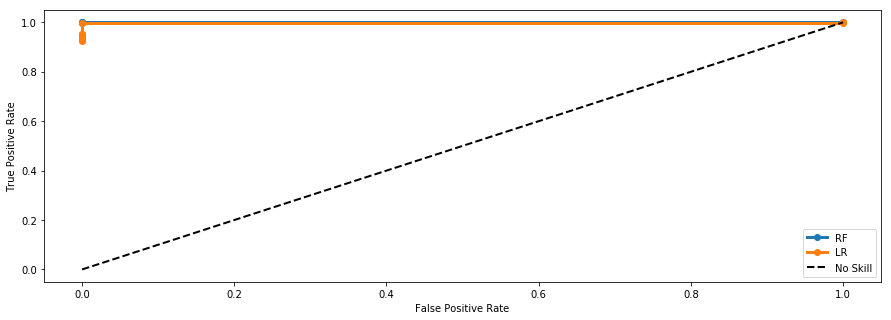

In [63]:
axes = plt.figure(figsize=(15,5))

for i in range(0, len(tp_set)):
    plt.plot(fp_set[i], tp_set[i],'-o', lw=3)
plt.plot([0, 1], [0, 1], '--k', lw=2)
plt.legend(['RF','LR','No Skill'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(688.855,0.5,'Valor Predito')

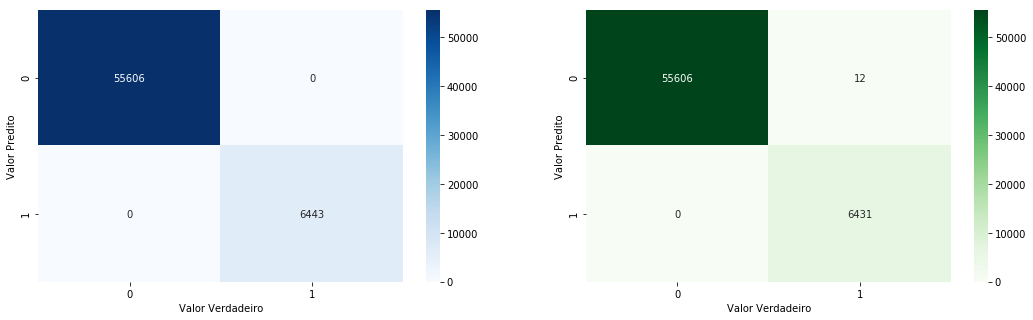

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,5))

################################################ Matriz de Confusão
cm = confusion_matrix(test_y, pred_yRF).T
#cm = cm.astype('float')/cm.sum(axis=0)*100

ax = sns.heatmap(cm, annot=True, cmap='Blues', ax=axes[0], fmt='.6g');
ax.set_xlabel('Valor Verdadeiro')
ax.set_ylabel('Valor Predito')

cm2 = confusion_matrix(test_y, pred_yLR).T
#cm2 = cm2.astype('float')/cm2.sum(axis=0)*100

ax2 = sns.heatmap(cm2, annot=True, cmap='Greens', ax=axes[1], fmt='.6g');
ax2.set_xlabel('Valor Verdadeiro')
ax2.set_ylabel('Valor Predito')

Para os valores, ***Random Forest***, de azul, acertou todos os valores **verdadeiros positivos** (6443, 100\%), ou seja, os que podem atrasar o pagamento. Acertou também todos os **verdadeiros negativos** (55606, 100\%), ou seja, os pagariam normalmente.

Já para ***Logistic Regression***, de verde, acertou parte dos **verdadeiros positivos** (6431, 99,8\%), mas acertou todos os valores **verdadeiros negativos** (55606, 100\%).

In [65]:
test_y.value_counts() 

0    55606
1     6443
Name: loan_status, dtype: int64

## Referências

- [Deepanshu Sharma](https://www.kaggle.com/deepanshu08/prediction-of-lendingclub-loan-defaulters)
- [Janio Martinez](https://www.kaggle.com/janiobachmann/lending-club-risk-analysis-and-metrics)